# Parkinson's Disease Detection

# Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("Libraries Imported")

Libraries Imported


# Loading the Dataset

In [56]:
df = pd.read_csv('parkinsons.data')
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


10 rows x 24 columns

In [57]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Total no. of Rows & Coulmns in Dataset

In [58]:
df.shape

(195, 24)

# Information about the Dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Checking for Null Values in each Coulmns

In [60]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Statistical Data about the Dataset

In [61]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


8 rows x 23 columns

# Graph for Healthy & Parkinsons Affected people from the Dataset

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

[Text(0, 0, 'Healthy'), Text(1, 0, "Parkinson's")]

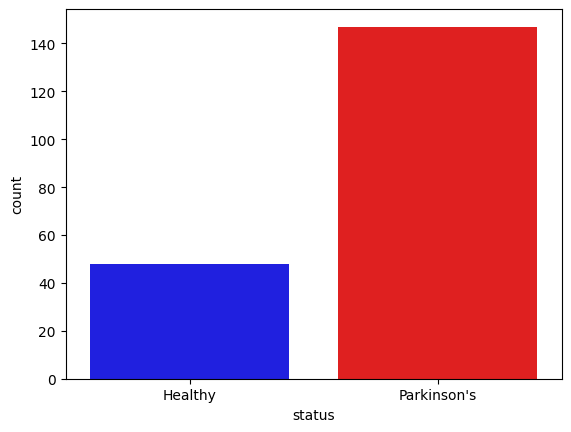

In [62]:
colors = ["blue", "red"]
sns.countplot(data = df, x = df['status'], palette=colors)
plt.subplot().set_xticklabels(["Healthy", "Parkinson's"])

Drop "name" Column

In [63]:
df.drop(columns='name', inplace=True)

# Analyzing Features
 Histograms

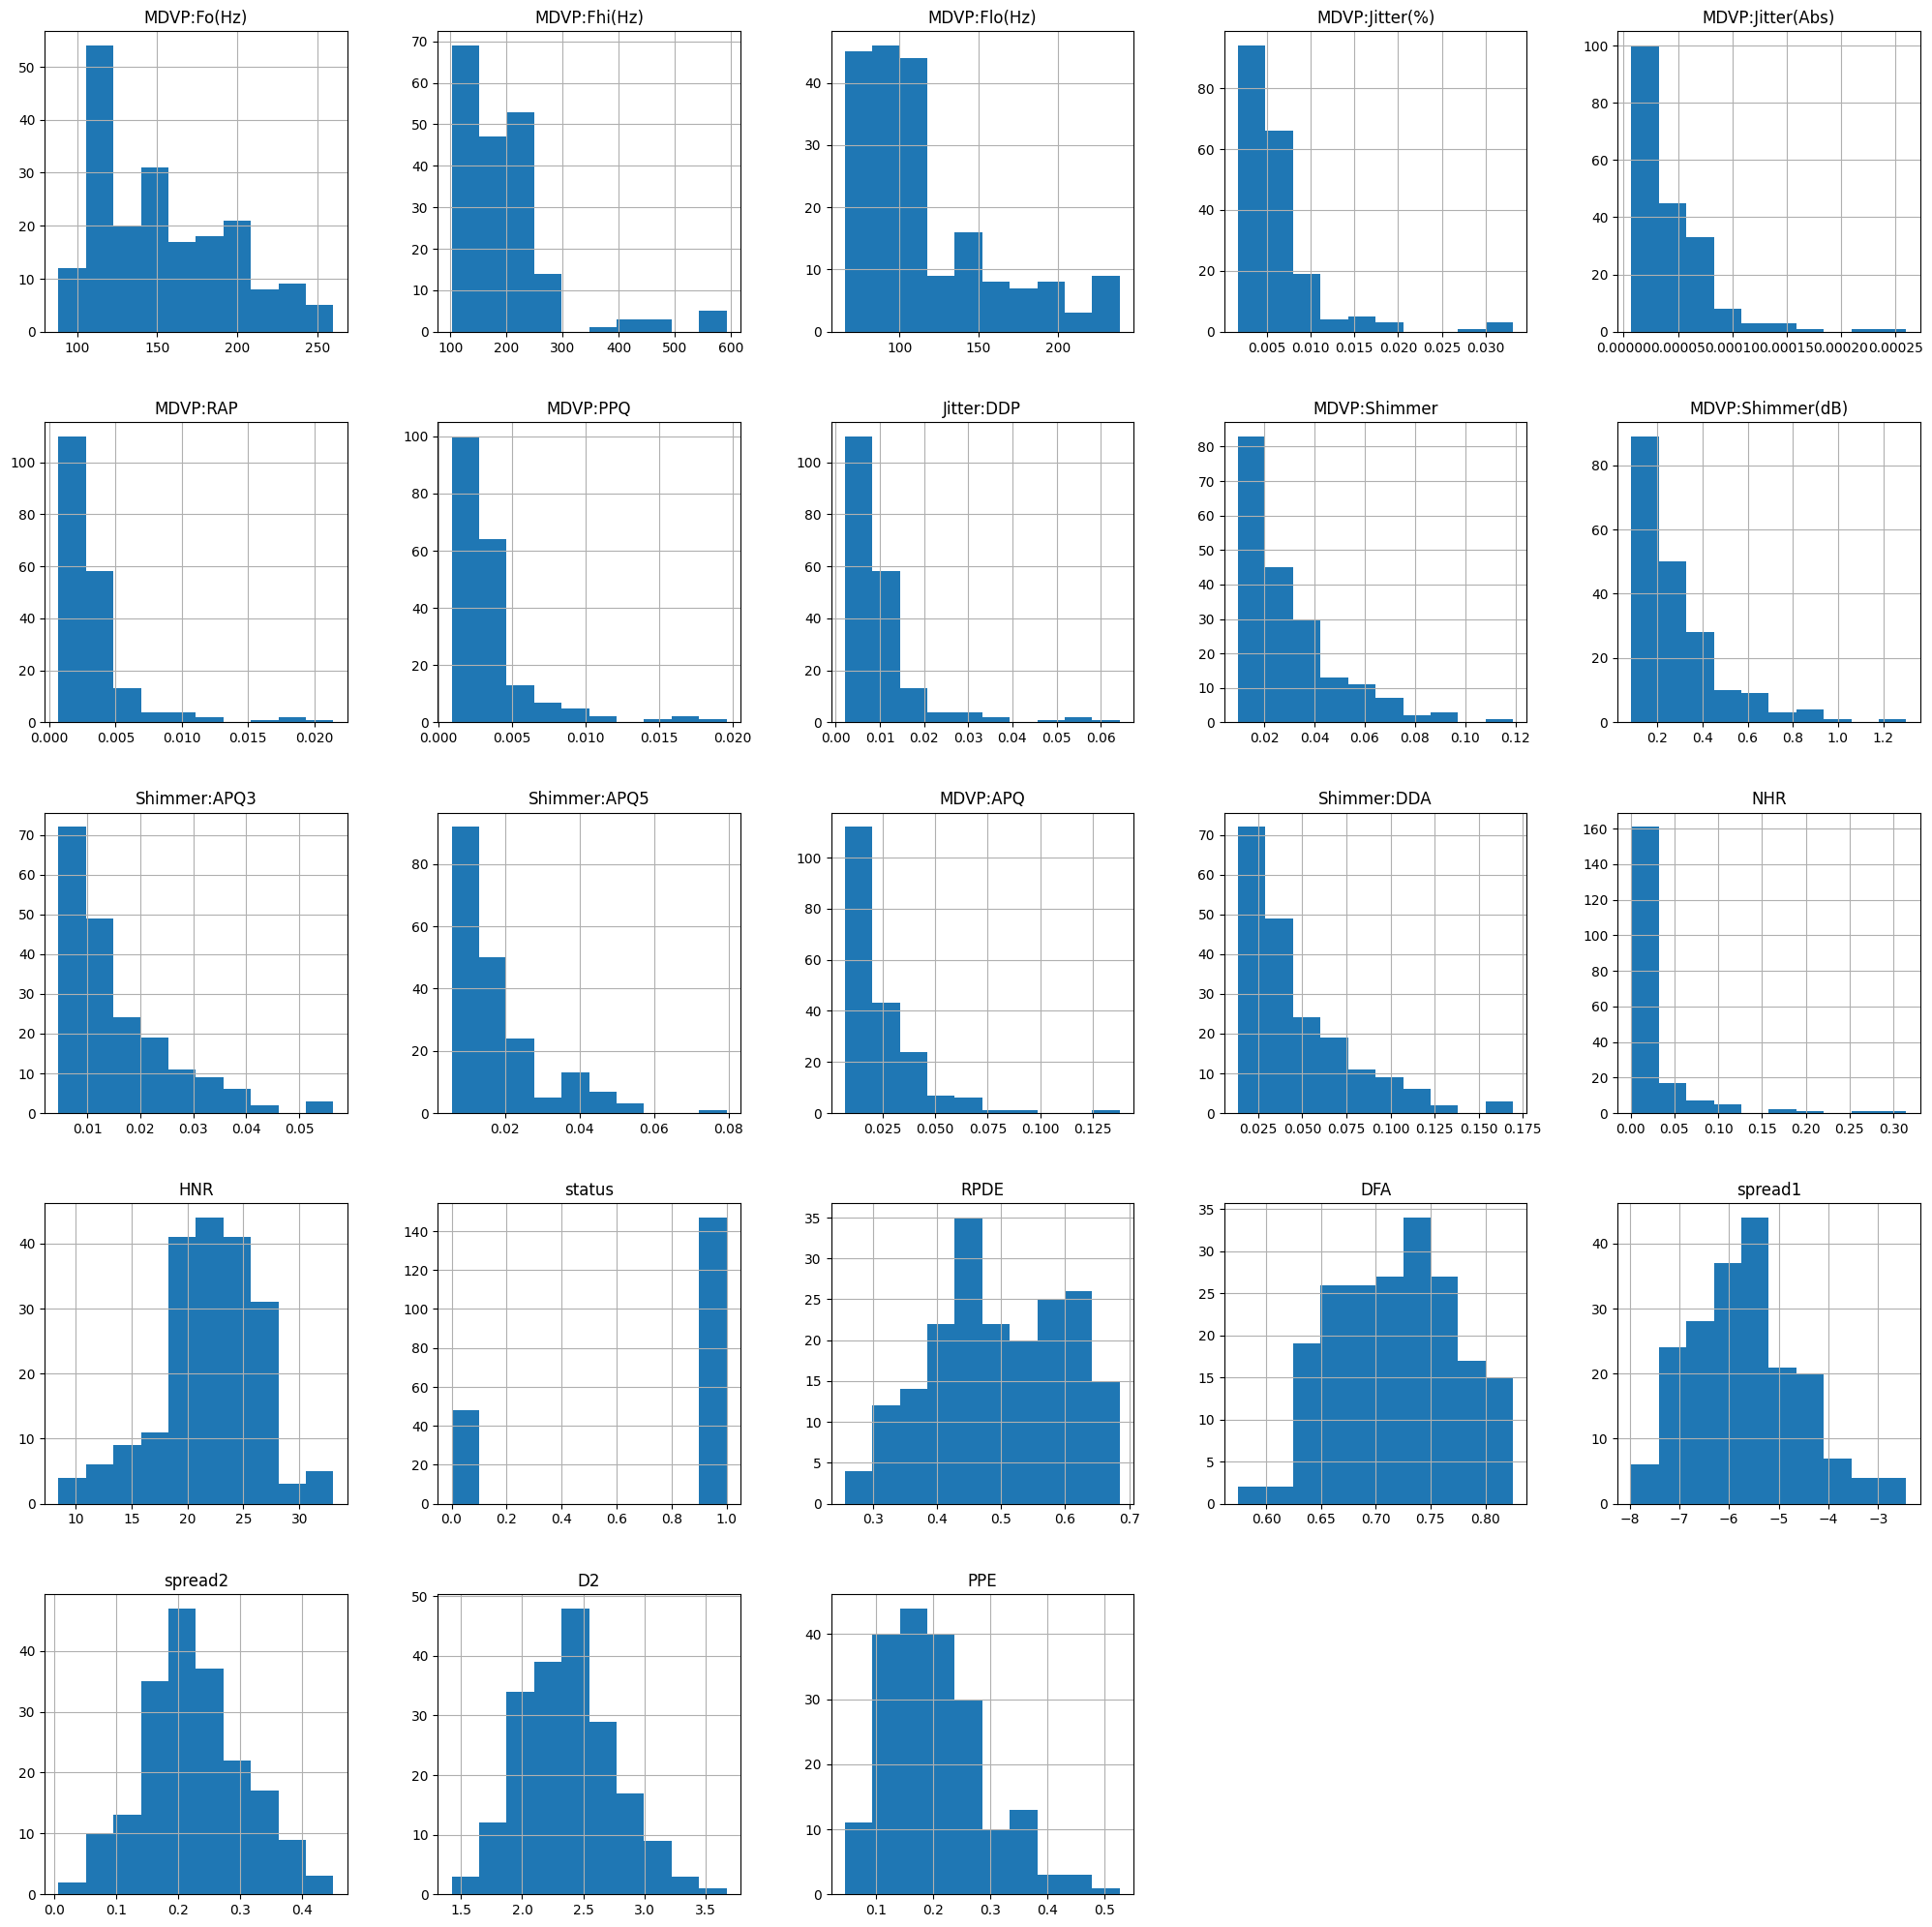

In [64]:
df.hist(figsize=(25,25))
plt.show()

# Skewness

In [65]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

# Creating a Correlation Matrix

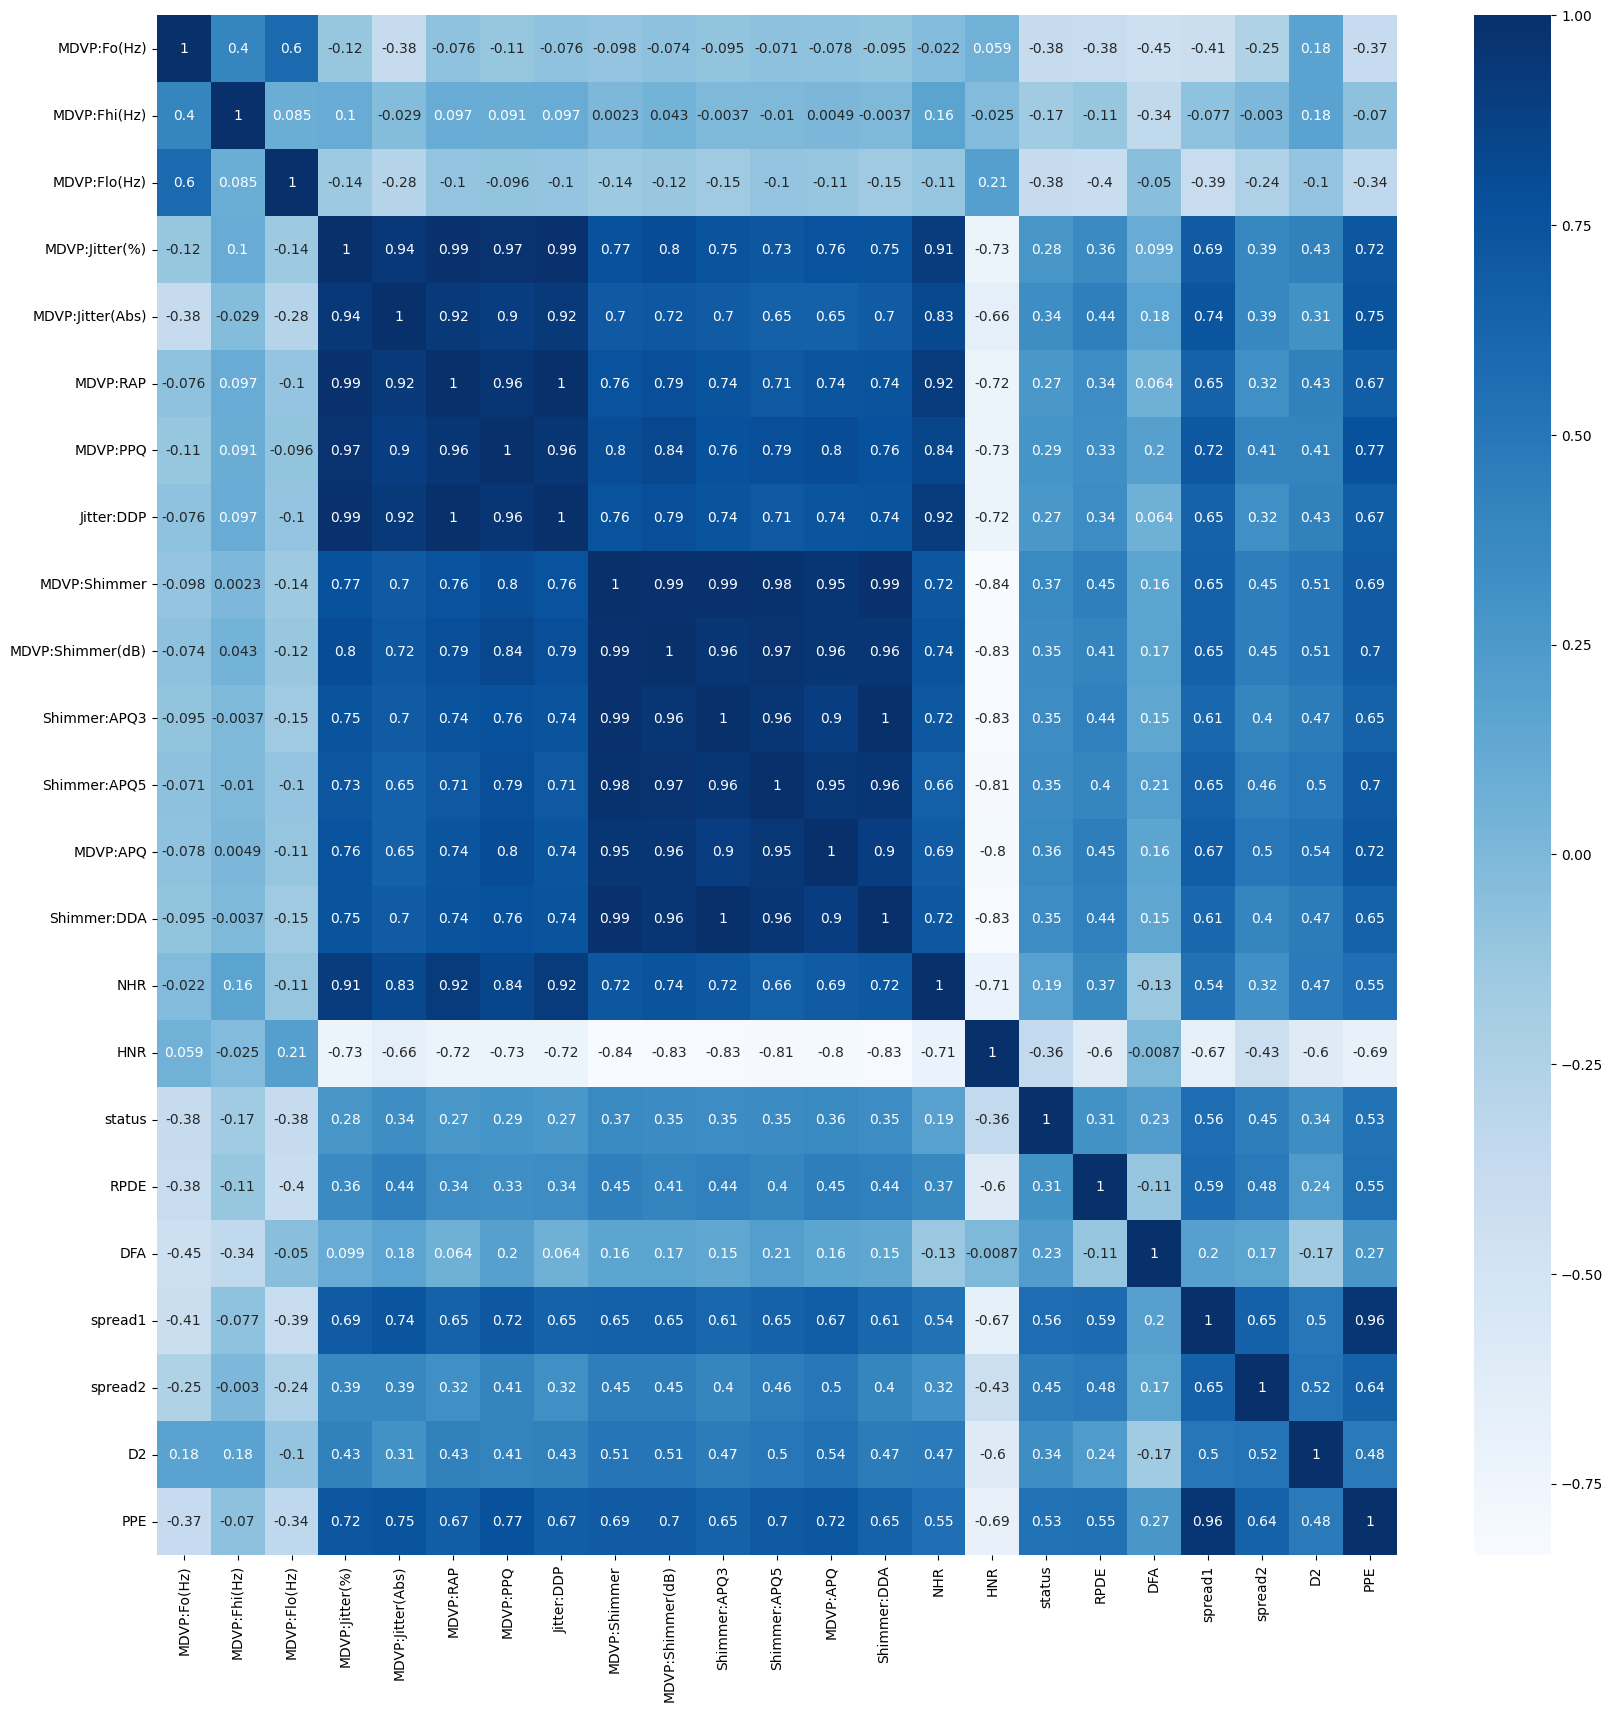

In [66]:
correl=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='Blues')
plt.show()

# Distribution of target variable

Our target variable here is 'status' column, 0 --> Without Parkison Disease, 1 --> Has Parkinson Disease

In [67]:
status_counts = df['status'].value_counts()
status_counts.name = 'status'
print(status_counts)

status
1    147
0     48
Name: status, dtype: int64


# Grouping the data based on target variable

In [68]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


# Data Preprocessing

Seperating Other variables and Target Variables

In [69]:
x = df.drop(columns='status')
y=df['status']

In [70]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
5        120.552       131.162       113.787         0.00968   
6        120.267       137.244       114.820         0.00333   
7        107.332       113.840       104.315         0.00290   
8         95.730       132.068        91.754         0.00551   
9         95.056       120.103        91.226         0.00532   
10        88.333       112.240        84.072         0.00505   
11        91.904       115.871        86.292         0.00540   
12       136.926       159.866       131.276         0.00293   
13       139.173       179.139        76.556         0.00390   
14       152.845       163.305        75

[195 rows x 22 columns]

In [71]:
print(y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     1
37     1
38     1
39     1
40     1
41     1
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     1
56     1
57     1
58     1
59     1
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

# Splitting data into training & testing

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [73]:
print(x.shape,x_train.shape,x_test.shape)

(195, 22) (156, 22) (39, 22)


# Data Standardization

The values of the dataset of all the columns varies. So we need to convert all the values in a common range.

In [74]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [75]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

Now all the values are in the same range.

In [76]:
print(x_train)

[[-0.04938976 -0.36715745  0.6912131  ... -0.20255164 -0.04744668
  -0.79838923]
 [-0.02783041 -0.36750004 -0.93498616 ... -0.24423601 -0.61997106
  -0.37928722]
 [-0.96304586 -0.81186798 -0.90797016 ...  0.41709719 -0.55337787
   0.49255679]
 ...
 [-0.77046517 -0.76369919 -0.02543986 ...  0.50233415 -0.73929201
  -0.80133623]
 [-0.92002406 -0.61330019 -0.14184101 ...  0.12298622 -0.08059836
   2.41901663]
 [-1.05560572 -0.73565211 -0.30778669 ...  0.16802627 -1.1492019
   1.54197752]]


# Model Training & Evaluation

# Logistic Regression

In [77]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [78]:
x_test_prediction=clf.predict(x_test)
accuracy_LR=accuracy_score(y_test,x_test_prediction)
f1_LR = f1_score(y_test, x_test_prediction)
precision_LR=precision_score(y_test,x_test_prediction)
recall_LR=recall_score(y_test,x_test_prediction)

Accuracy, F1 Score, Precision & Recall of Logistic Regression

In [79]:
print("Accuracy score of test data: ",accuracy_LR)
print("F1 score of test data: ",f1_LR)
print("precision: ",precision_LR)
print("recall: ",recall_LR)

Accuracy score of test data:  0.9230769230769231
F1 score of test data:  0.9508196721311475
precision:  0.9354838709677419
recall:  0.9666666666666667


Confusion Matrix of Logistic Regression

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

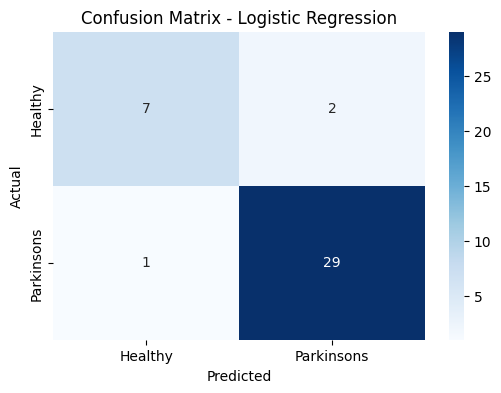

In [80]:
cm=confusion_matrix(y_test,x_test_prediction)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=['Healthy','Parkinsons'],yticklabels=['Healthy','Parkinsons'])
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Logistic Regression")

# Support Vector Machine (SVM)

In [81]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [82]:
x_test_prediction=clf.predict(x_test)
accuracy_SVM=accuracy_score(y_test,x_test_prediction)
f1_SVM = f1_score(y_test, x_test_prediction)
precision_SVM=precision_score(y_test,x_test_prediction)
recall_SVM=recall_score(y_test,x_test_prediction)

Accuracy, F1 Score, Precision & Recall of Support Vector Machine

In [83]:
print("Accuracy score of test data: ",accuracy_SVM)
print("F1 score of test data: ",f1_SVM)
print("precision: ",precision_SVM)
print("recall: ",recall_SVM)

Accuracy score of test data:  0.8974358974358975
F1 score of test data:  0.9375
precision:  0.8823529411764706
recall:  1.0


Confusion Matrix of Support Vector Machine

Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machine')

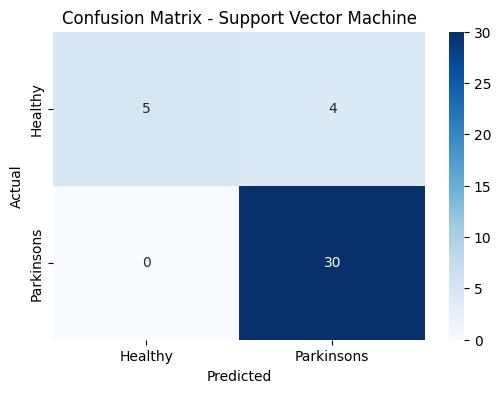

In [84]:
cm=confusion_matrix(y_test,x_test_prediction)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=['Healthy','Parkinsons'],yticklabels=['Healthy','Parkinsons'])
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Support Vector Machine")

# Random Forest Classifier

In [85]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [86]:
x_test_prediction=clf.predict(x_test)
accuracy_RF=accuracy_score(y_test,x_test_prediction)
f1_RF = f1_score(y_test, x_test_prediction)
precision_RF=precision_score(y_test,x_test_prediction)
recall_RF=recall_score(y_test,x_test_prediction)

Accuracy, F1 Score, Precision & Recall of Random Forest Classifier

In [87]:
print("Accuracy score of test data: ",accuracy_RF)
print("F1 score of test data: ",f1_RF)
print("precision: ",precision_RF)
print("recall: ",recall_RF)

Accuracy score of test data:  0.8717948717948718
F1 score of test data:  0.9180327868852459
precision:  0.9032258064516129
recall:  0.9333333333333333


Confusion Matrix of Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix - Random Forest Classifier')

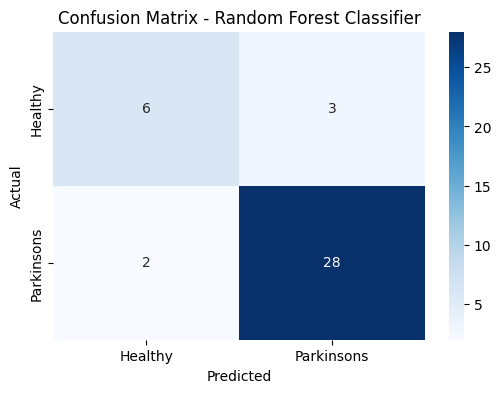

In [88]:
cm=confusion_matrix(y_test,x_test_prediction)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=['Healthy','Parkinsons'],yticklabels=['Healthy','Parkinsons'])
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest Classifier")

# Gradient Boosting Classifier

In [89]:
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [90]:
x_test_prediction=clf.predict(x_test)
accuracy_GB=accuracy_score(y_test,x_test_prediction)
f1_GB = f1_score(y_test, x_test_prediction)
precision_GB=precision_score(y_test,x_test_prediction)
recall_GB=recall_score(y_test,x_test_prediction)

Accuracy, F1 Score, Precision & Recall of Graident Boosting Classifier

In [91]:
print("Accuracy score of test data: ",accuracy_GB)
print("F1 score of test data: ",f1_GB)
print("precision: ",precision_GB)
print("recall: ",recall_GB)

Accuracy score of test data:  0.9230769230769231
F1 score of test data:  0.9491525423728814
precision:  0.9655172413793104
recall:  0.9333333333333333


Confusion Matrix of Gradient Boosting classifier

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting Classifier')

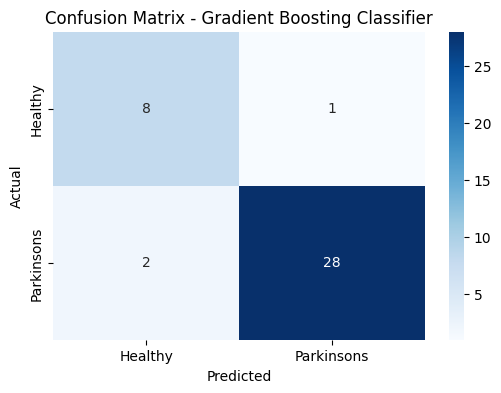

In [92]:
cm=confusion_matrix(y_test,x_test_prediction)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=['Healthy','Parkinsons'],yticklabels=['Healthy','Parkinsons'])
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Gradient Boosting Classifier")

# K-Nearest Neighbors

In [93]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
x_test_prediction=clf.predict(x_test)
accuracy_KNN=accuracy_score(y_test,x_test_prediction)
f1_KNN = f1_score(y_test, x_test_prediction)
precision_KNN=precision_score(y_test,x_test_prediction)
recall_KNN=recall_score(y_test,x_test_prediction)

Accuracy, F1 Score, Precision & Recall of K-Nearest Neighbors

In [95]:
print("Accuracy score of test data: ",accuracy_KNN)
print("F1 score of test data: ",f1_KNN)
print("precision: ",precision_KNN)
print("recall: ",recall_KNN)

Accuracy score of test data:  0.8974358974358975
F1 score of test data:  0.9333333333333333
precision:  0.9333333333333333
recall:  0.9333333333333333


Confusion Matrix of K-Nearest Neighbors

Text(0.5, 1.0, 'Confusion Matrix - K-Nearest Neighbors')

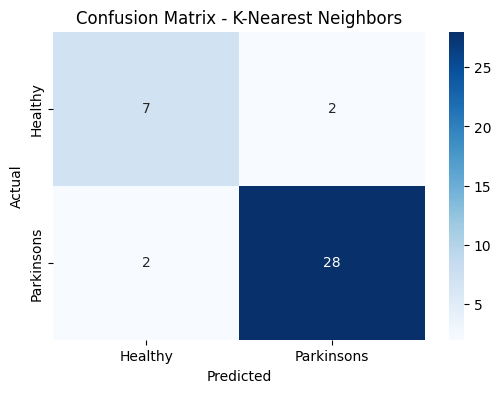

In [96]:
cm=confusion_matrix(y_test,x_test_prediction)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=['Healthy','Parkinsons'],yticklabels=['Healthy','Parkinsons'])
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - K-Nearest Neighbors")

# XGBoost

In [97]:
clf = XGBClassifier()
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
x_test_prediction=clf.predict(x_test)
accuracy_XGB=accuracy_score(y_test,x_test_prediction)
f1_XGB = f1_score(y_test, x_test_prediction)
precision_XGB=precision_score(y_test,x_test_prediction)
recall_XGB=recall_score(y_test,x_test_prediction)

Accuracy, F1 Score, Precision & Recall of XGBoost

In [99]:
print("Accuracy score of test data: ",accuracy_XGB)
print("F1 score of test data: ",f1_XGB)
print("precision: ",precision_XGB)
print("recall: ",recall_XGB)

Accuracy score of test data:  0.9743589743589743
F1 score of test data:  0.9830508474576272
precision:  1.0
recall:  0.9666666666666667


Confusion Matrix of XGBoost

Text(0.5, 1.0, 'Confusion Matrix - XGBoost')

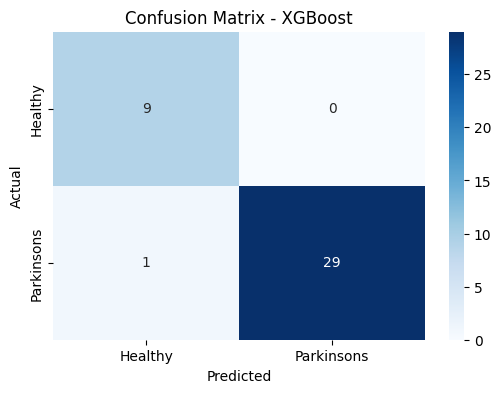

In [100]:
cm=confusion_matrix(y_test,x_test_prediction)
plt.figure(figsize=(6,4))
fg=sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=['Healthy','Parkinsons'],yticklabels=['Healthy','Parkinsons'])
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - XGBoost")

# Comparison of Evaluation Metrics of different ML Models

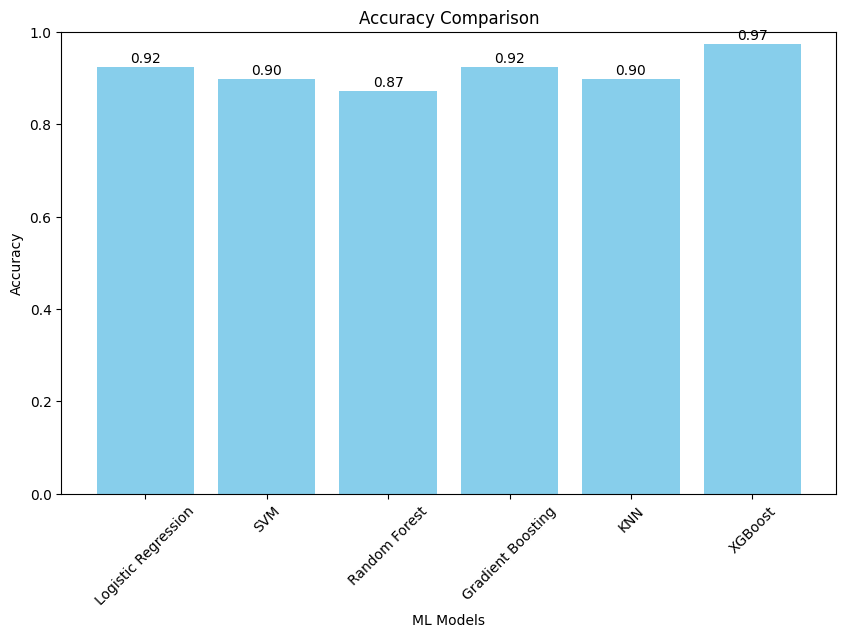

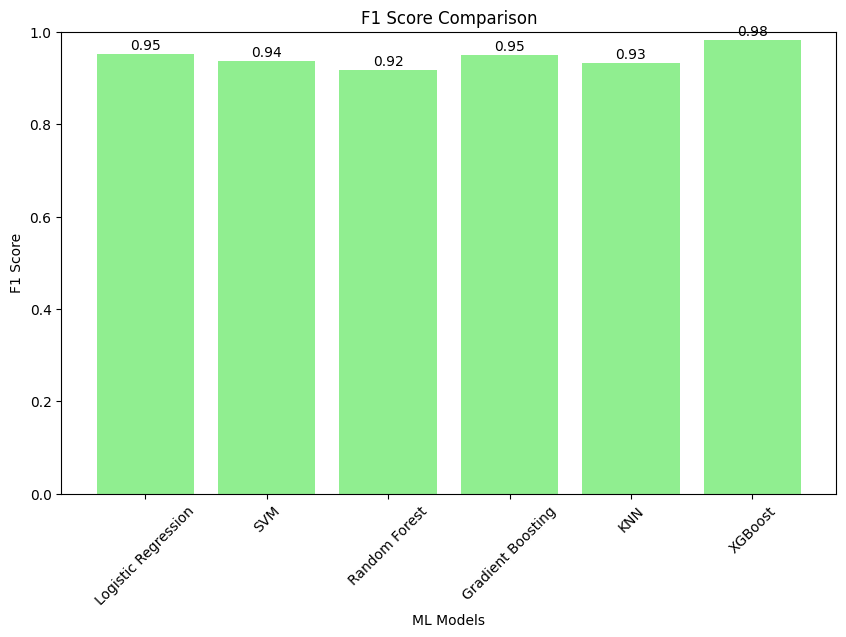

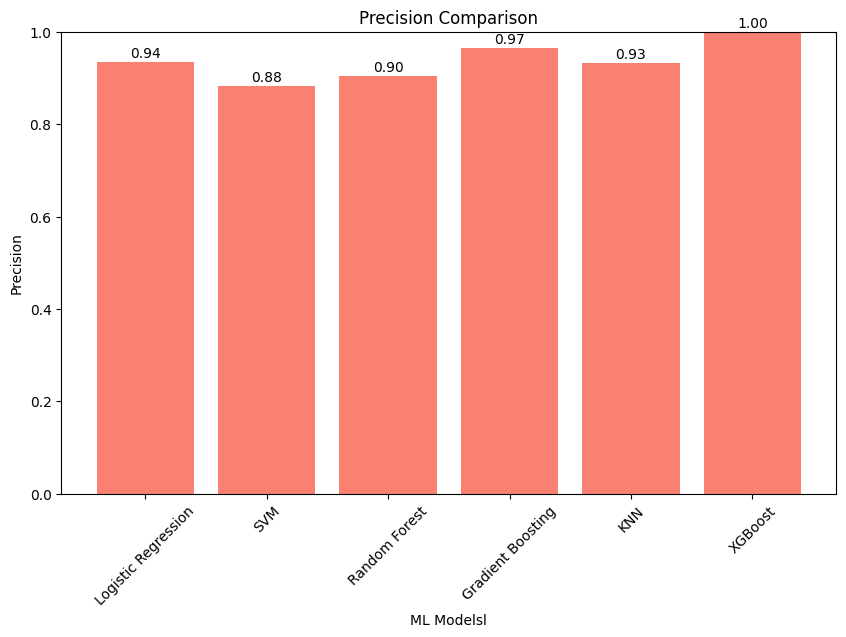

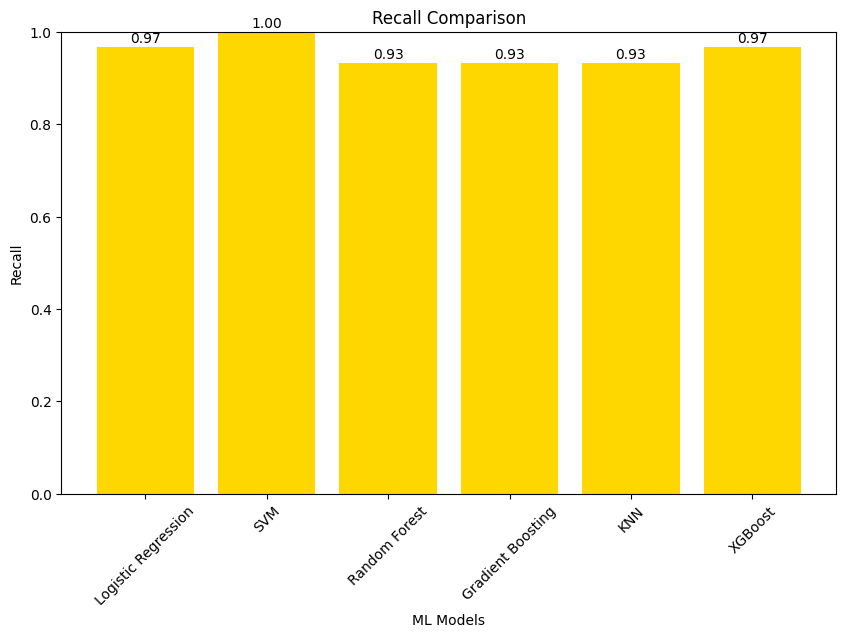

In [101]:
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost']
accuracies = [accuracy_LR, accuracy_SVM, accuracy_RF, accuracy_GB, accuracy_KNN, accuracy_XGB]
f1_scores = [f1_LR, f1_SVM, f1_RF, f1_GB, f1_KNN, f1_XGB]
precisions = [precision_LR, precision_SVM, precision_RF, precision_GB, precision_KNN, precision_XGB]
recalls = [recall_LR, recall_SVM, recall_RF, recall_GB, recall_KNN, recall_XGB]

# Function to add annotations
def add_annotations(ax, data):
    for i, value in enumerate(data):
        ax.text(i, value + 0.01, '{:.2f}'.format(value), ha='center')

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
add_annotations(plt.gca(), accuracies)
plt.show()

# Plotting F1 score
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='lightgreen')
plt.xlabel('ML Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
add_annotations(plt.gca(), f1_scores)
plt.show()

# Plotting precision
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color='salmon')
plt.xlabel('ML Modelsl')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
add_annotations(plt.gca(), precisions)
plt.show()

# Plotting recall
plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color='gold')
plt.xlabel('ML Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
add_annotations(plt.gca(), recalls)
plt.show()

# Summary of all the Machine Learning models

In [102]:
summary = {'Accuracy' : [accuracy_LR, accuracy_SVM, accuracy_RF, accuracy_GB, accuracy_KNN, accuracy_XGB],
		'Recall' : [recall_LR, recall_SVM, recall_RF, recall_GB, recall_KNN, recall_XGB],
		'precision' : [precision_LR, precision_SVM, precision_RF, precision_GB, precision_KNN, precision_XGB],
		'F1 Score' : [f1_LR, f1_SVM, f1_RF, f1_GB, f1_KNN, f1_XGB]}
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'KNN', 'XGBoost']
sum_df = pd.DataFrame(summary,models)

In [103]:
sum_df

,Accuracy,Recall,precision,F1 Score
Logistic Regression,0.923077,0.966667,0.935484,0.950820
SVM,0.897436,1.000000,0.882353,0.937500
Random Forest,0.871795,0.933333,0.903226,0.918033
Gradient Boosting,0.923077,0.933333,0.965517,0.949153
KNN,0.897436,0.933333,0.933333,0.933333
XGBoost,0.974359,0.966667,1.000000,0.983051


# ROC_AUC Scores & ROC_Curve for different Machine Learning Models

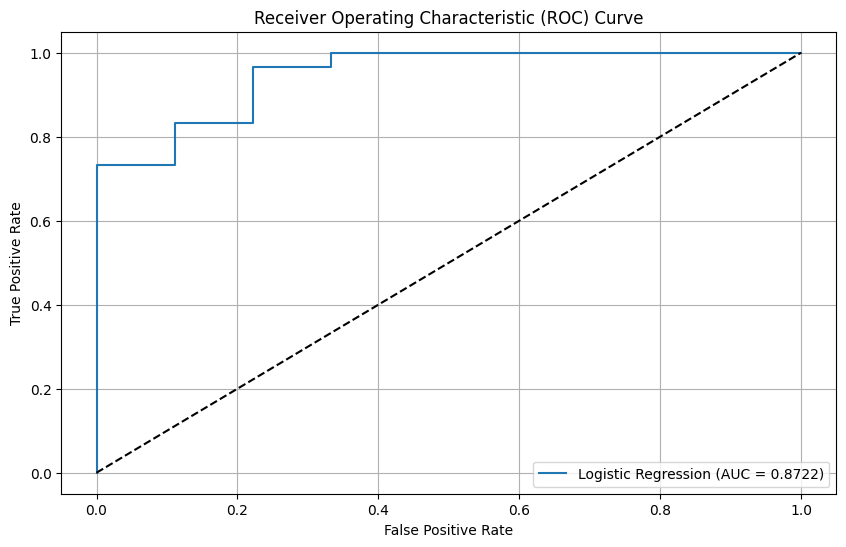

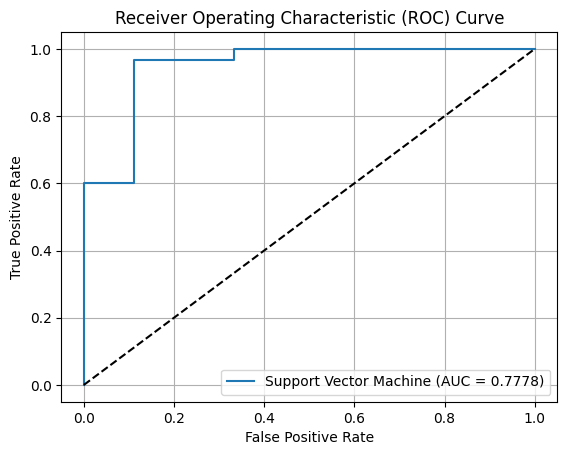

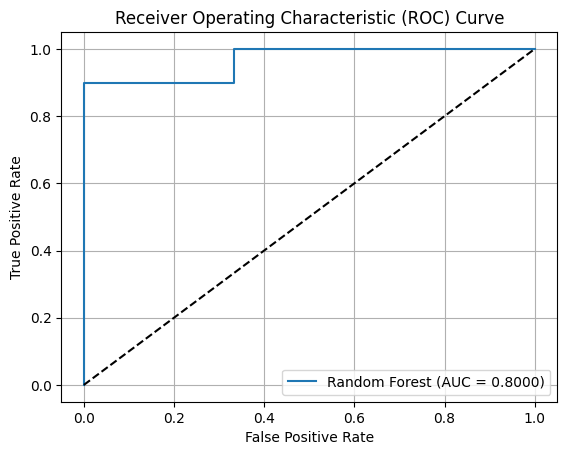

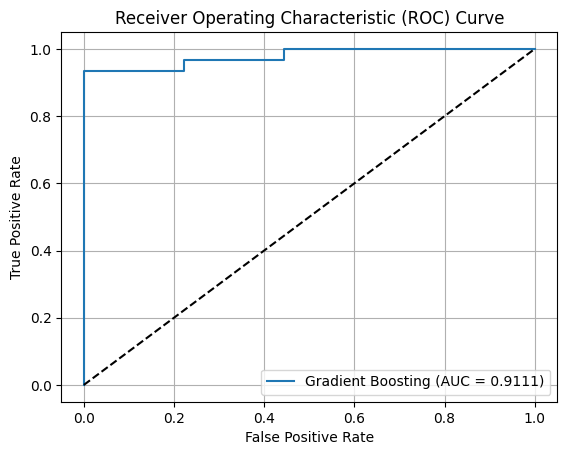

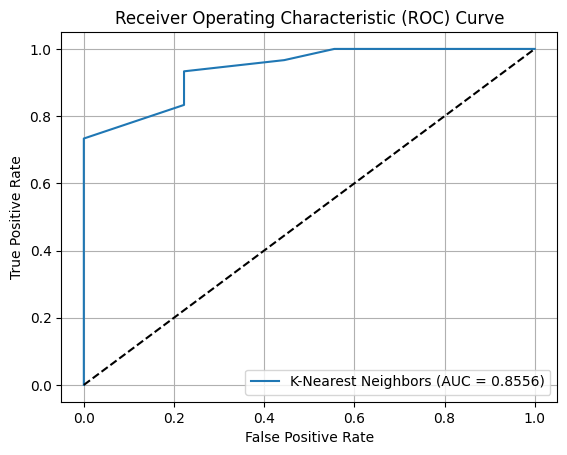

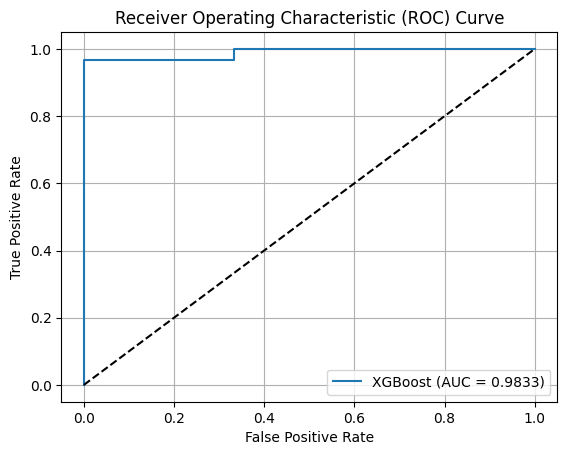

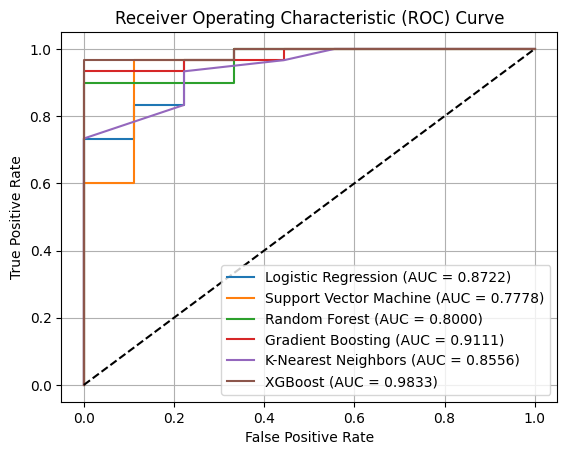

In [104]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),  # Set probability=True
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost' : XGBClassifier()
}

roc_auc_scores = {}
plt.figure(figsize=(10, 6))

for name, clf in classifiers.items():
    
    clf.fit(x_train, y_train)
   
    x_test_prediction = clf.predict(x_test)
      
    roc_auc = roc_auc_score(y_test, x_test_prediction)
    roc_auc_scores[name] = roc_auc

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[name]:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

for name, clf in classifiers.items():
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_scores[name]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)
plt.legend()
plt.show()  

# Output

In [105]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
x_test_prediction=clf.predict(x_test)

# Comparing actual and predicted values of the test data

In [106]:
pd.DataFrame({'actual':y_test,'predict':x_test_prediction})

,actual,predict
21,1,1
9,1,1
75,1,1
40,1,1
187,0,0
6,1,1
20,1,1
139,1,1
154,1,1
153,1,1


In [110]:

input_data = (95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571)
#input_data=(244.99000,272.21000,239.17000,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.18100,0.01084,0.01121,0.01255,0.03253,0.01049,21.52800,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220)
#input_data=(197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.0068,0.00902,0.01689,0.00339,26.715,0.422229,0.741367,-7.3483,0.177551,1.743867,0.085569)


## changing input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

## reshape the numpy array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

## standarize the data
std_data= scaler.transform(input_data_reshaped)

prediction= clf.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Some error in processing')


[1]
The patient has Parkinson


In [108]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)